[**Demo %s**](#demo-traffic-solvea)

The following are parameters and a function relevant to defining the problem.

In [2]:
rho_c = 1080;  rho_m = 380;  q_m = 10000;
Q0prime = @(rho) 4*q_m*rho_c^2 * (rho_c - rho_m) * rho_m ...
    *(rho_m - rho) ./ ((rho_c - 2*rho_m) * rho + rho_c * rho_m).^3;
ep = 0.02;

Here we create a discretization on $m=800$ points.

In [3]:
[x, Dx, Dxx] = diffper(800, [0, 4]);

Next we define the ODE resulting from the method of lines.

In [4]:
odefun = @(t, rho) -Q0prime(rho) .* (Dx*rho) + ep * (Dxx*rho);
ivp = ode(ODEFcn=odefun);
ivp.InitialTime = 0;
ivp.RelativeTolerance = 1e-5;

Our first initial condition has moderate density with a small bump. Because of the diffusion present, we use a stiff solver for the IVP.

In [5]:
rho_init = 400 + 10 * exp(-20*(x-3).^2);
ivp.InitialValue = rho_init;

t = linspace(0, 1, 101);
sol = solve(ivp, t);
RHO = sol.Solution;

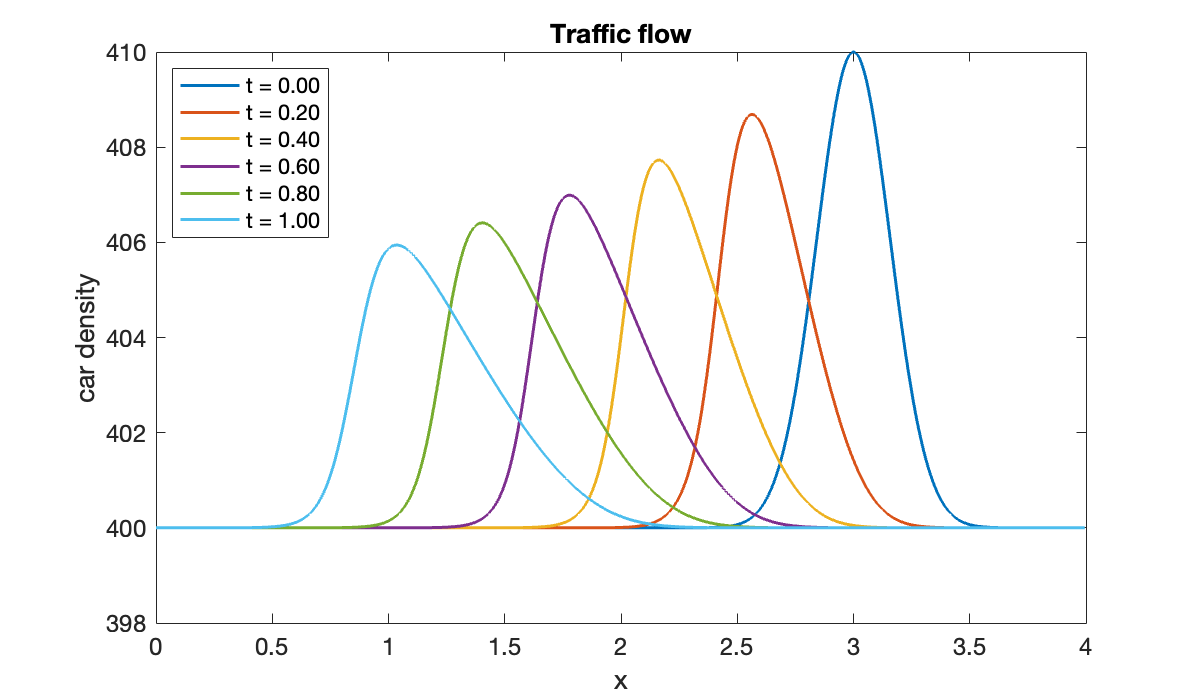

In [6]:
clf
for plot_idx = 1:20:101
    str = sprintf("t = %.2f", t(plot_idx));
    plot(x, RHO(:, plot_idx), displayname=str)
    hold on
end
xlabel('x'),  ylabel('car density')
title('Traffic flow') 
legend(location="northwest")

The bump slowly moves backward on the roadway, spreading out and gradually fading away due to the presence of diffusion.

In [ ]:
clf
plot(x, RHO(:, 1))
hold on,  grid on
axis([0, 4, 398, 410])
title('Traffic flow') 
xlabel('x'),  ylabel('u(x,t)')
vid = VideoWriter("traffic-small.mp4","MPEG-4");
vid.Quality = 85;
open(vid);
for frame = 1:length(t)
    cla, plot(x, RHO(:, frame))
    str = sprintf("t = %.2f", t(frame));
    text(0.2, 409, str);
    writeVideo(vid, frame2im(getframe(gcf)));
end
close(vid)
close(gcf)